In [1]:
from HouseholdSpecializationModelFindsen import HouseholdSpecializationModelClass
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Question 1
We loop over different values of $\alpha$ and $\sigma$

In [18]:
#Setting up household
model = HouseholdSpecializationModelClass()

par = model.par
sol = model.sol

#Creating arrays for alpha and sigma
alpha_vec = np.array([0.25,0.50,0.75])
sigma_vec = np.array([0.5,1,1.5])

out = np.zeros((len(alpha_vec),len(sigma_vec)))

for i_a, a in enumerate(alpha_vec):
    for i_s ,s in enumerate(sigma_vec):
        
        opt = model.solve_discrete(alpha=a,sigma=s)
        
        out[i_a,i_s]=opt.HF/opt.HM

/Users/RasmusHamann/Desktop/Københavns Universitet/Kandidat/8. Semester/Introduction to Programming/projects-2023-f-m-r-23/projects-2023-f-m-r-23/inauguralproject/HouseholdSpecializationModelFindsen.py:68: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))
/Users/RasmusHamann/Desktop/Københavns Universitet/Kandidat/8. Semester/Introduction to Programming/projects-2023-f-m-r-23/projects-2023-f-m-r-23/inauguralproject/HouseholdSpecializationModelFindsen.py:68: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))
/Users/RasmusHamann/Desktop/Københavns Universitet/Kandidat/8. Semester/Introduction to Programming/projects-2023-f-m-r-23/projects-2023-f-m-r-23/inauguralproject/HouseholdSpecializationModelFindsen.py:72: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho

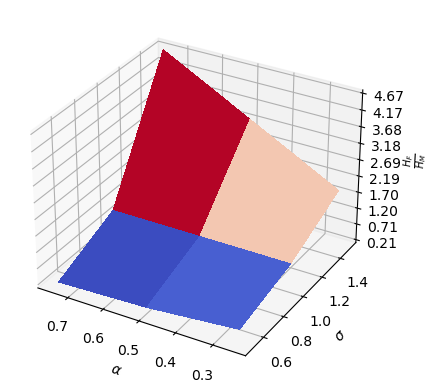

In [29]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = alpha_vec = np.array([0.25,0.50,0.75])
Y = sigma_vec = np.array([0.5,1,1.5])
X, Y = np.meshgrid(X, Y)
Z = out

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(np.min(out), np.max(out))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_ylabel('$\sigma$')
ax.set_xlabel(r'$\alpha$')
ax.set_zlabel(r'$\frac{H_F}{H_M}$',rotation=180)
ax.invert_xaxis()

plt.show()

In [27]:
out

array([[0.54545455, 0.30769231, 0.21428571],
       [1.        , 1.        , 1.        ],
       [1.83333333, 3.25      , 4.66666667]])

We see that when $\alpha$ is small it does not affect $\sigma$ significant but $\alpha$ affects $\frac{H_F}{H_M}$ more. The higher $\alpha$ the higher $\frac{H_F}{H_M}$. The same yields for the ratio between $\sigma$ and $\frac{H_F}{H_M}$. $\alpha$ is the productivity and as alpha becomes higher, it yields that the women are more productive at home. 

# Question 2

In [3]:
model.solve_wF_vec(discrete=True)
lH_vec_disc = par.lH_vec.copy()

# Question 3

In [4]:
model.solve_wF_vec(discrete=False)
lH_vec_cont = par.lH_vec.copy()

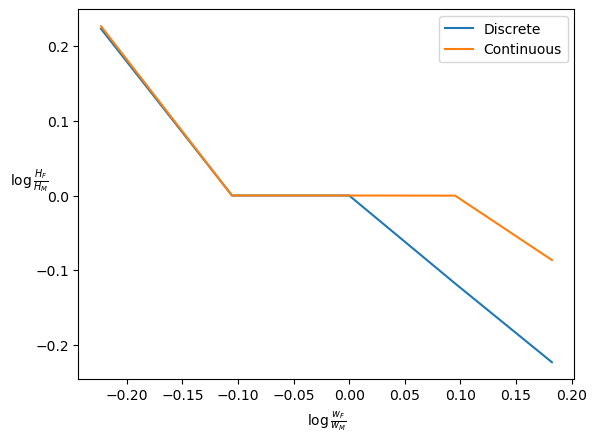

In [5]:
fig, ax = plt.subplots(dpi=100)

ax.plot(par.lw_vec,lH_vec_disc,label='Discrete')
ax.plot(par.lw_vec,lH_vec_cont,label='Continuous')
ax.set_ylabel(r'$\log\frac{H_F}{H_M}$',rotation=0)
ax.set_xlabel(r'$\log\frac{w_F}{w_M}$')

plt.legend()
plt.show()

In [6]:
model.run_regression()

# Question 4

In [7]:
model.estimate(do_print=True)

/Users/RasmusHamann/Desktop/Københavns Universitet/Kandidat/8. Semester/Introduction to Programming/projects-2023-f-m-r-23/projects-2023-f-m-r-23/inauguralproject/HouseholdSpecializationModelFindsen.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))
/Users/RasmusHamann/Desktop/Københavns Universitet/Kandidat/8. Semester/Introduction to Programming/projects-2023-f-m-r-23/projects-2023-f-m-r-23/inauguralproject/HouseholdSpecializationModelFindsen.py:68: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))


Optimization terminated successfully.
alpha_hat: 0.9883
sigma_hat: 0.0908
beta0_hat: 0.4000
beta1_hat: -0.0999
Termination value: 0.0000


$\frac{Q^{1-\rho}}{1-\rho} - \nu\Bigg(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} + \frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} + \delta(L_F-\mu)^2\Bigg)$

# Question 5

In [8]:
par.dummy = 1
par.alpha = 0.5

In [9]:
model.estimate_(do_print=True)

Optimization terminated successfully.
sigma_hat: 0.2798
mu_hat: 1.1141
beta0_hat: 0.0869
beta1_hat: -0.1575
Termination value: 0.1014
